In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities from citipy
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(f" There are {city_count} cities in the list.")

 There are 590 cities in the list.


## Perform API Calls

In [3]:
#Gather weather data from openweathermap api and fill the appropriate lists
weatherCities = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wspeed = []
country = []
edate = []

#Set up the url information
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        weatherCities.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"]) #the starter code refers to "Max Temp", not "Temp"
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wspeed.append(response["wind"]["speed"])
        edate.append(response["dt"])
        
        index = cities.index(city)
        print(f"Processing record {index + 1} of {city_count} | {city}") 
        
    except (KeyError, IndexError): 
        print(f"City {city} not found. Skipping City.")
        pass

Processing record 1 of 590 | georgetown
Processing record 2 of 590 | cape town
Processing record 3 of 590 | busselton
Processing record 4 of 590 | hobart
Processing record 5 of 590 | rikitea
Processing record 6 of 590 | wuhu
Processing record 7 of 590 | mataura
Processing record 8 of 590 | tarko-sale
Processing record 9 of 590 | yumen
Processing record 10 of 590 | ghatanji
Processing record 11 of 590 | rocha
Processing record 12 of 590 | bengkulu
Processing record 13 of 590 | atuona
City illoqqortoormiut not found. Skipping City.
Processing record 15 of 590 | fort nelson
Processing record 16 of 590 | tuatapere
City taolanaro not found. Skipping City.
Processing record 18 of 590 | cardston
Processing record 19 of 590 | shambu
Processing record 20 of 590 | new norfolk
City belushya guba not found. Skipping City.
Processing record 22 of 590 | luganville
Processing record 23 of 590 | bluff
Processing record 24 of 590 | camacha
Processing record 25 of 590 | san ramon
Processing record 26 of

## Convert Raw Data to DataFrame

In [4]:
#Create the dictionary of weather information for each city, and then convert to data frame and display    
weather_dict = {
    "City": weatherCities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp (F)": temp,
    "Humidity (%)": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wspeed,
    "Date": edate
}
#Save the city weather data as a data frame
weather_data = pd.DataFrame(weather_dict)

In [5]:
#Clean the data frame by removing any entries with humidity levels over 100%
weather_data_cl = weather_data[weather_data["Humidity (%)"] <= 100]
weather_data_cl.index.name = "City ID"

#Store the first date to label all the plots
start_time = weather_data_cl["Date"].iloc[0]
date = time.strftime('%m-%d-%Y', time.localtime(start_time))

#Convert epoch time into CST
weather_data_cl["Date"] = pd.to_datetime(weather_data_cl["Date"], unit='s', utc=True).dt.tz_convert('US/Central')

#Save the city weather data as a csv
weather_data_cl.to_csv("output_data/cities.csv", sep=',', encoding='utf-8')

#Display the cleaned and formatted data frame
weather_data_cl.head()

,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
City ID,,,,,,,,,
0,George Town,MY,5.4112,100.3354,79.90,93,20,3.44,2022-02-07 17:21:48-06:00
1,Cape Town,ZA,-33.9258,18.4232,69.10,91,100,17.27,2022-02-07 17:21:49-06:00
2,Busselton,AU,-33.6500,115.3333,60.04,80,7,1.61,2022-02-07 17:21:49-06:00
3,Hobart,AU,-42.8794,147.3294,68.22,62,75,9.22,2022-02-07 17:19:20-06:00
4,Rikitea,PF,-23.1203,-134.9692,78.71,75,73,13.13,2022-02-07 17:21:49-06:00


## Plotting the Data

In [6]:
#Define a function that will create a scatter plot and save it
def scattered(xlabel, ylabel, lat_range, date, savename):
    plt.figure()
    plt.scatter(weather_data_cl[xlabel], weather_data_cl[ylabel], marker = "o", facecolors="skyblue", edgecolors="black")
    plt.grid()
    plt.xlabel(xlabel)
    plt.xlim(lat_range[0], lat_range[1])
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel} ({date})")
    
    #Save the figure
    plt.savefig("output_data/"+ savename)
    
    #Display the figure
    plt.show()    

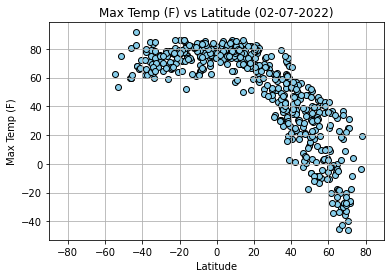

 The plot above is analysing the relationship between Max Temp (F) and Latitude.
 Based on the plot, there does appear to be a relationship between Max Temp (F) and Latitude


In [32]:
# Temperature (F) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "MaxTvsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, there does appear to be a relationship between Max Temp (F) and Latitude")

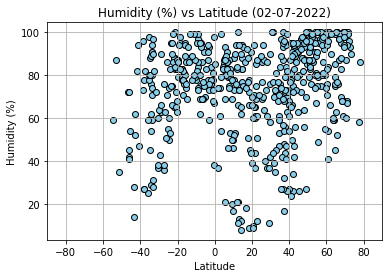

 The plot above is analysing the relationship between Humidity (%) and Latitude.
 Based on the plot, many of the cities found tend to have higher (greater than 60%) humidity.


In [33]:
# Humidity (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "HumVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, many of the cities found tend to have higher (greater than 60%) humidity.")

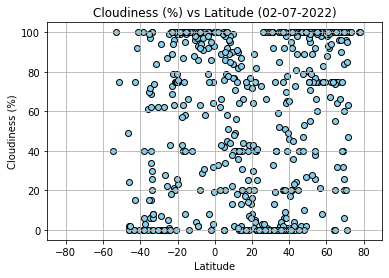

 The plot above is analysing the relationship between Cloudiness (%) and Latitude.
 Based on the plot, the relationship between Cloudiness (%) and Latitude is likely weak.


In [34]:
# Cloudiness (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "CloudVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, the relationship between Cloudiness (%) and Latitude is likely weak.")

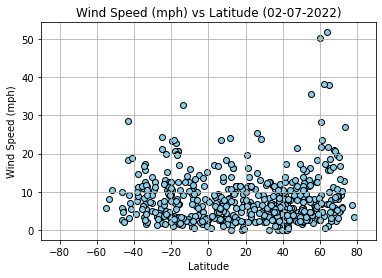

 The plot above is analysing the relationship between Wind Speed (mph) and Latitude.
 Based on the plot, the relationship between Wind Speed (mph) and Latitude is likely weak.


In [35]:
# Wind Speed (mph) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "WSpdVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, the relationship between Wind Speed (mph) and Latitude is likely weak.")

## Linear Regression

In [11]:
#Create separate data frames for the northern and southern hemispheres
north_weather_data = weather_data_cl[weather_data_cl["Latitude"] >= 0]
south_weather_data = weather_data_cl[weather_data_cl["Latitude"] < 0]

#Create a data frame for the xlim values for the scatter plots below
xaxis = pd.DataFrame({"Northern": (0, 80), "Southern": (-60, 0)})

In [12]:
#Define a function that will output the r-value, scatter plot, linear regression line, and linear regression equation

def linreg(hemisphere, xlabel, ylabel, annoloc, savename, date):

    if hemisphere == "Northern":
        xvalues = north_weather_data[xlabel]
        yvalues = north_weather_data[ylabel]
    else:     
        xvalues = south_weather_data[xlabel]
        yvalues = south_weather_data[ylabel]
        
    #Format the scatter plot
    plt.figure()
    plt.title(f"{hemisphere} Hemisphere: {ylabel} vs {xlabel} ({date})")
    xlim = xaxis[hemisphere] #pull the xlim values from a data frame
    plt.xlim(xlim)
    plt.scatter(xvalues, yvalues, marker = "o", facecolors="skyblue", edgecolors="black")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #Calculate everything needed for the linear regression line
    (slope, intercept, rvalue, pvalue, stdder) = linregress(xvalues, yvalues)
    line = slope * xvalues + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Format the linear regression line plot
    plt.plot(xvalues, line, color = "red")
    plt.annotate(line_eq, annoloc, fontsize = 15, color = "red")

    #Save the figure
    plt.savefig("output_data/"+ savename)
        
    #Show r-value and the plot
    print(f"The r-value is {round(rvalue, 4)}")
    plt.show();

The r-value is -0.8599


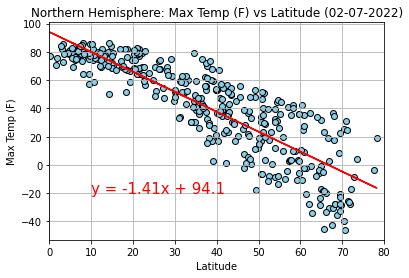

analysis


In [13]:
# Northern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "N_MaxTvsLat"
annoloc = (10,-20)   #annotation location for the linear regression equation

#Call on the user-defined linreg function
linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

print("analysis")

The r-value is 0.3687


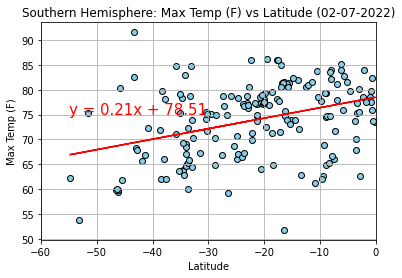

In [14]:
#Southern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "S_MaxTvsLat"
annoloc = (-55,75)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.2964


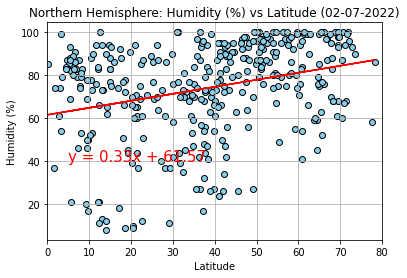

In [15]:
#Northern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "N_HumVsLat"
annoloc = (5,40)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.4146


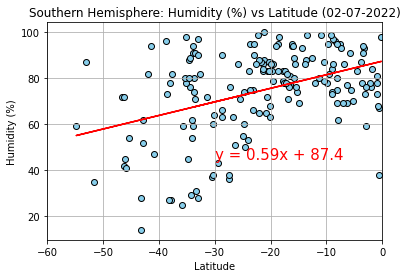

In [16]:
#Southern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "S_HumVsLat"
annoloc = (-30,45)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.258


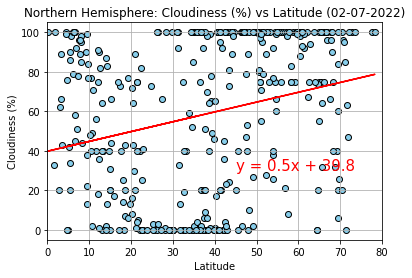

In [17]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "N_CloudVsLat"
annoloc = (45,30)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.3826


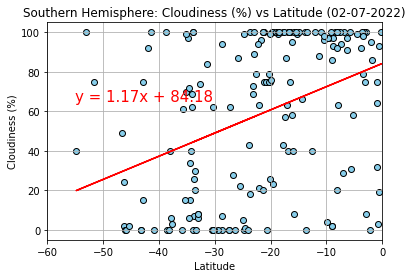

In [18]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "S_CloudVsLat"
annoloc = (-55,65)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.1863


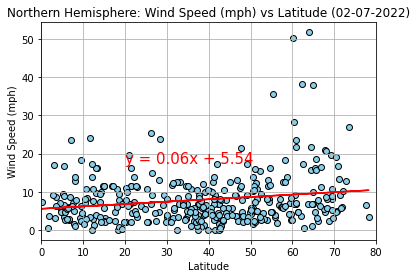

In [19]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "N_WSpdVsLat"
annoloc = (20,17.5)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is -0.1105


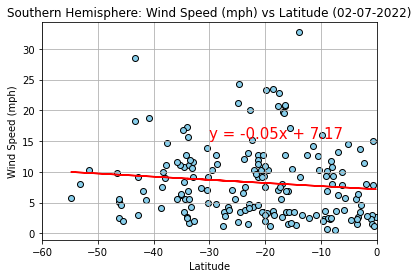

In [20]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "S_WSpdVsLat"
annoloc = (-30, 15.5)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)